## Классификация ирисов

Будем писать нейросеть классифицирующую подвид ирисов по размерам лепестка и чашелистика

![alt text](img/iris.jpg "Title")

Данные содаржатся в файле iris.csv и имеют следующий формат:

![alt text](img/iris-data.jpg "Title")

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import tensorflow as tf
tf.get_logger().setLevel('ERROR')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

1. Загрузи данные в pandas DataFrame

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


2. С помощью функции [pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html) библиотеки [seaborn](https://seaborn.pydata.org/index.html) оцени корреляцию параметров

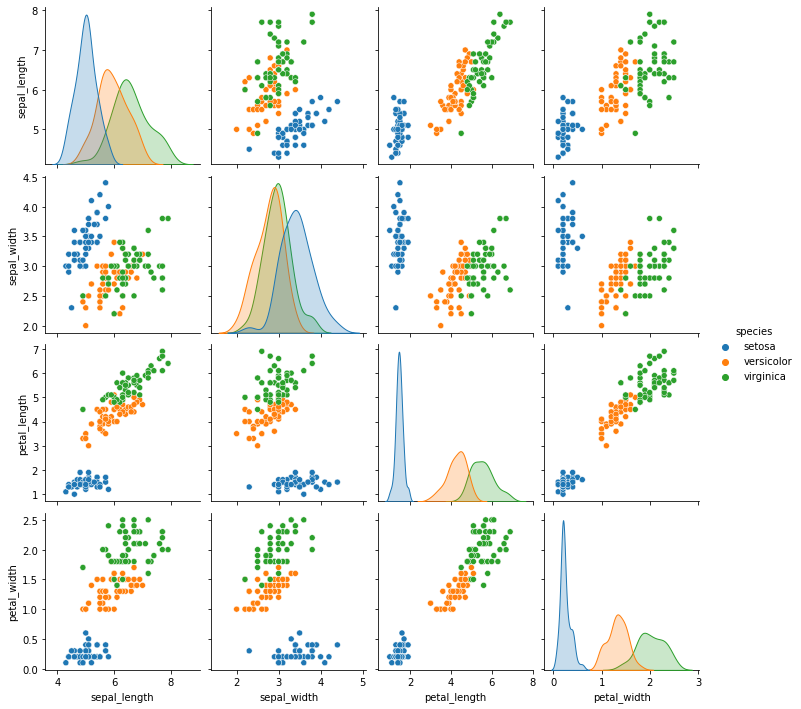

In [3]:
import seaborn
seaborn.pairplot(df, hue='species')

3. Подумай об архитектуре сети, в частности о shape входа и выхода. Обзятельно обсуди этот вопрос с учителем.

4. Узнай от учитиля об [OneHotEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из библиотеки [sklearn](https://scikit-learn.org/stable/index.html)

5. Добавь в pandas DataFrame стоблец классов, закодированный через [OneHotEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) (тут понадобится reshape, поскольку OneHotEncoder работает с batch-массивом данных)

In [4]:
import sklearn.preprocessing
import numpy as np
ohe = sklearn.preprocessing.OneHotEncoder(sparse = False)
spc=list(df['species'])
spc=np.array(spc)
spc=spc.reshape(-1, 1)
o = ohe.fit_transform(spc)
df['ohe'] = list(o)
df

,sepal_length,sepal_width,petal_length,petal_width,species,ohe
0,5.1,3.5,1.4,0.2,setosa,"[1.0, 0.0, 0.0]"
1,4.9,3.0,1.4,0.2,setosa,"[1.0, 0.0, 0.0]"
2,4.7,3.2,1.3,0.2,setosa,"[1.0, 0.0, 0.0]"
3,4.6,3.1,1.5,0.2,setosa,"[1.0, 0.0, 0.0]"
4,5.0,3.6,1.4,0.2,setosa,"[1.0, 0.0, 0.0]"
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,"[0.0, 0.0, 1.0]"
146,6.3,2.5,5.0,1.9,virginica,"[0.0, 0.0, 1.0]"
147,6.5,3.0,5.2,2.0,virginica,"[0.0, 0.0, 1.0]"
148,6.2,3.4,5.4,2.3,virginica,"[0.0, 0.0, 1.0]"


6. Выдели из pandas DataFrame данные для обучения в переменные **x** и **y**

In [5]:
#x=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values.tolist()
#x=x.to_numpy()

y=list(df['ohe'])
#y=y.to_numpy()

7. Раздели данные на обучающую и проверочную выборку при помощи функции [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) библиотекти [sklearn](https://scikit-learn.org/stable/index.html)

In [9]:
import sklearn.model_selection

x_train, x_val, y_train, y_val = sklearn.model_selection.train_test_split(x, y, test_size=0.05)

8. Создай модель нейросети. Поговори с учителем о функциях фактивации [ReLu](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B8_%D1%80%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9#.D0.A4.D1.83.D0.BD.D0.BA.D1.86.D0.B8.D1.8F_ReLU) для промежуточных слоёв и [softmax](https://congyuzhou.medium.com/softmax-3408fb42d55a) для верхних.
Выведи сводку по сети для оценки входных и выходных данных, их формы, количества слоёв и обучаемых параметров

In [10]:
model = tf.keras.Sequential(name = 'iris')

model.add(tf.keras.layers.InputLayer(input_shape = (4,)))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "iris"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


9. Скомпилируй сеть для обучения. В качестве лосс-функции следует выбрирать [CategoricalCrossentropy()](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy), а в качестве метрики - [accuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy). Обсуди эти особенности с учителем.

In [11]:
model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
    metrics = ['accuracy'],
)

10. Обучи модель, выбрав оптимальные мета-параметры (количество эпох, размер батча и т.д.)

In [17]:
x_train = np.array(x_train)
y_train = np.array(list(y_train))
x_val=np.array(x_val)
y_val=np.array(list(y_val))

In [18]:
res = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 10,
    epochs = 5,
    validation_data = (x_val, y_val),
    shuffle = True,
)

Epoch 1/5
15/15 [==============================] - 0s 6ms/step - loss: 0.0408 - accuracy: 0.9789 - val_loss: 0.4469 - val_accuracy: 0.7500
Epoch 2/5
15/15 [==============================] - 0s 4ms/step - loss: 0.0403 - accuracy: 0.9789 - val_loss: 0.5003 - val_accuracy: 0.7500
Epoch 3/5
15/15 [==============================] - 0s 4ms/step - loss: 0.0384 - accuracy: 0.9859 - val_loss: 0.4778 - val_accuracy: 0.7500
Epoch 4/5
15/15 [==============================] - 0s 4ms/step - loss: 0.0386 - accuracy: 0.9859 - val_loss: 0.4814 - val_accuracy: 0.7500
Epoch 5/5
15/15 [==============================] - 0s 4ms/step - loss: 0.0384 - accuracy: 0.9859 - val_loss: 0.4877 - val_accuracy: 0.7500


11. Построй графики параметров обучения. Оцени их. Если необходимо, продолжи обучение или начни его заново с новыми мета-параметрами.

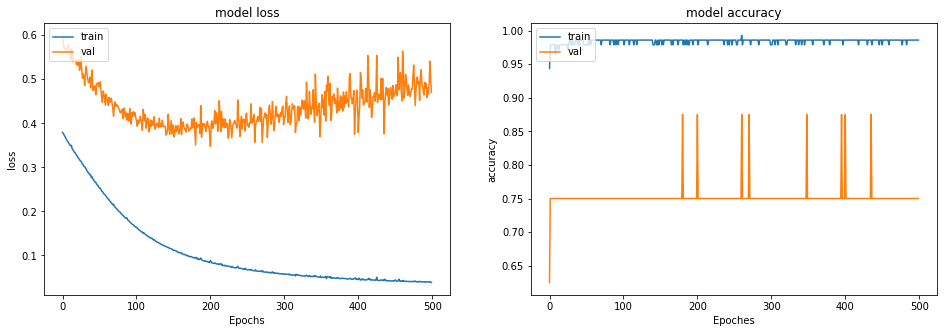

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 5))

ax = fig.add_subplot(121)
ax.plot(res.history['loss'])
ax.plot(res.history['val_loss'])
ax.set_title('model loss')
ax.set_ylabel('loss')
ax.set_xlabel('Epochs')
ax.legend(['train', 'val', 'runs'], loc='upper left')

ax = fig.add_subplot(122)
ax.plot(res.history['accuracy'])
ax.plot(res.history['val_accuracy'])
ax.set_title('model accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('Epoches')
ax.legend(['train', 'val', 'runs'], loc='upper left')

12. Оцени кочество обученной модели при помощи метода [evaluate()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)

In [21]:
model.evaluate(
    x=x_val,
    y=y_val,
)

1/1 [==============================] - 0s 24ms/step - loss: 0.4877 - accuracy: 0.7500


[0.48771992325782776, 0.75]

13. При помощи метода [inverse_transform()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder.inverse_transform) объекта [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) и функции [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) библиотеки [sklearn](https://scikit-learn.org/stable/index.html), построй "[Confusion Matrix](https://hranalytic.ru/kak-ponyat-matrica-nesootvetstvij-confusion-matrix/)" для множества x_val. Отобразить матрицу лучше всего при помощи функции [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html) библиотеки [seaborn](https://seaborn.pydata.org/index.html).

In [50]:
y_val_pred = model.predict(x_val)

y_val_pred_classes = ohe.inverse_transform(y_val_pred)
y_val_classes = ohe.inverse_transform(y_val)

[[1 0 0]
 [0 3 2]
 [0 0 2]]


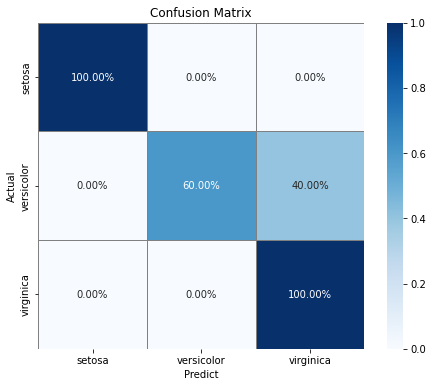

In [51]:
import sklearn.metrics

class_names = list(ohe.categories_[0])

cm = sklearn.metrics.confusion_matrix(
    y_true = y_val_classes,
    y_pred = y_val_pred_classes,
)

cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

import seaborn as sns

plt.figure(figsize=(8,6))
ax = sns.heatmap(cmn, annot=True, fmt='.2%', xticklabels=class_names, yticklabels=class_names, cmap='Blues', square=True, linewidths=0.5, linecolor='gray')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predict')
ax.set_ylabel('Actual');
plt.show()

In [60]:
ohe.inverse_transform(model.predict([[1, 4, 1.5, -0.9]]))[0][0]

'setosa'